In [55]:
# Library for loading dataset
import pandas as pd

# Library for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library for warnings
import warnings
warnings.filterwarnings('ignore')

In [56]:
# Load data
diamond = pd.read_csv('clean_diamonds.csv')
diamond

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [57]:
# Drop index column
diamond.drop(columns=['index'], inplace=True)

In [58]:
# Shows general information about dataset
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<p align='center'>Data lista para ser analizada</p>

<br>
<h2 align='center'>CARAT ⚖</h2>

         count      mean       std  min  25%  50%   75%   max
carat  53943.0  0.797935  0.473999  0.2  0.4  0.7  1.04  5.01


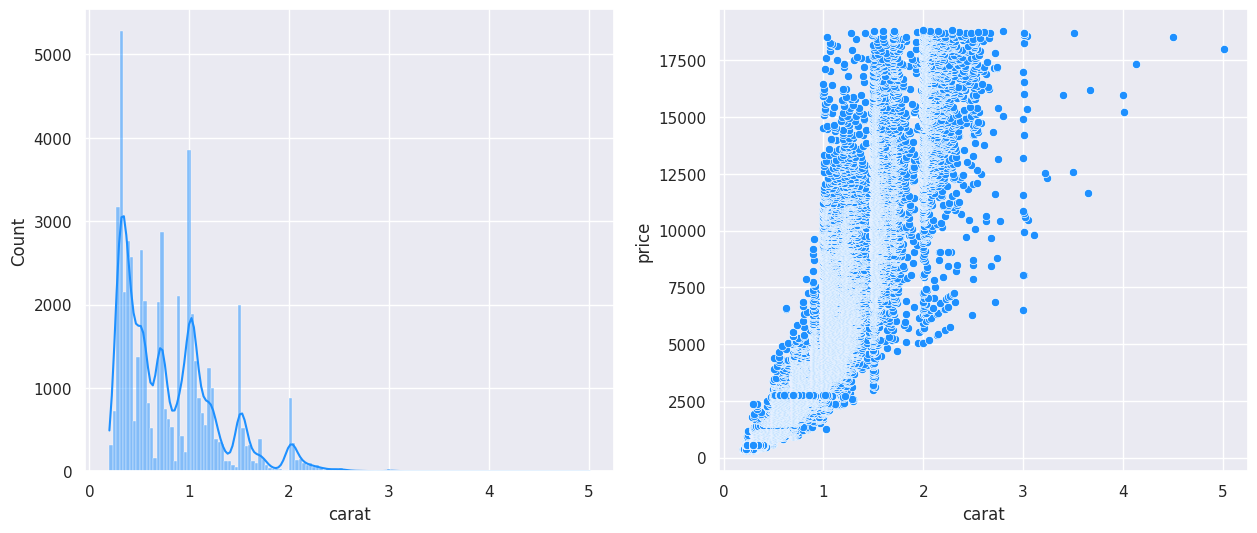

In [59]:
# Description about CARAT with histogram and scatterplot by price

plt.figure(figsize=(15,6))
sns.set_theme(style='darkgrid')
description_carat = pd.DataFrame(diamond['carat'].describe())
print(description_carat.T)

plt.subplot(1,2,1)
sns.histplot(data=diamond, x='carat', color='dodgerblue', kde=True)
plt.subplot(1,2,2)
sns.scatterplot(data=diamond, x='carat', y='price', color='dodgerblue')
plt.show()

<br>
<h3 align='center'>Observaciones 🕵️‍♂️</h3>
<p>
    <li> <b>Media</b> cercana a 0.8 gr</li>
    <br>
    <li>La <b>mediana</b> es de  0.7 gr</li>
    <br>
    <li>Podemos observar que el rango de peso de la gran mayoria de los diamantes se encuentra entre los 0.2 gr y los 1 gr (se puede obtener este dato ya que el 75% de los diamantes tienen un peso por debajo de 1.04 gr aproximandamente)</li>
</p>

<br>
<h2 align='center'>CUT ✨</h2>

     count unique    top   freq
cut  53943      5  Ideal  21551

      Ideal  Premium  Very Good  Good  Fair
cut  21551    13793      12083  4906  1610


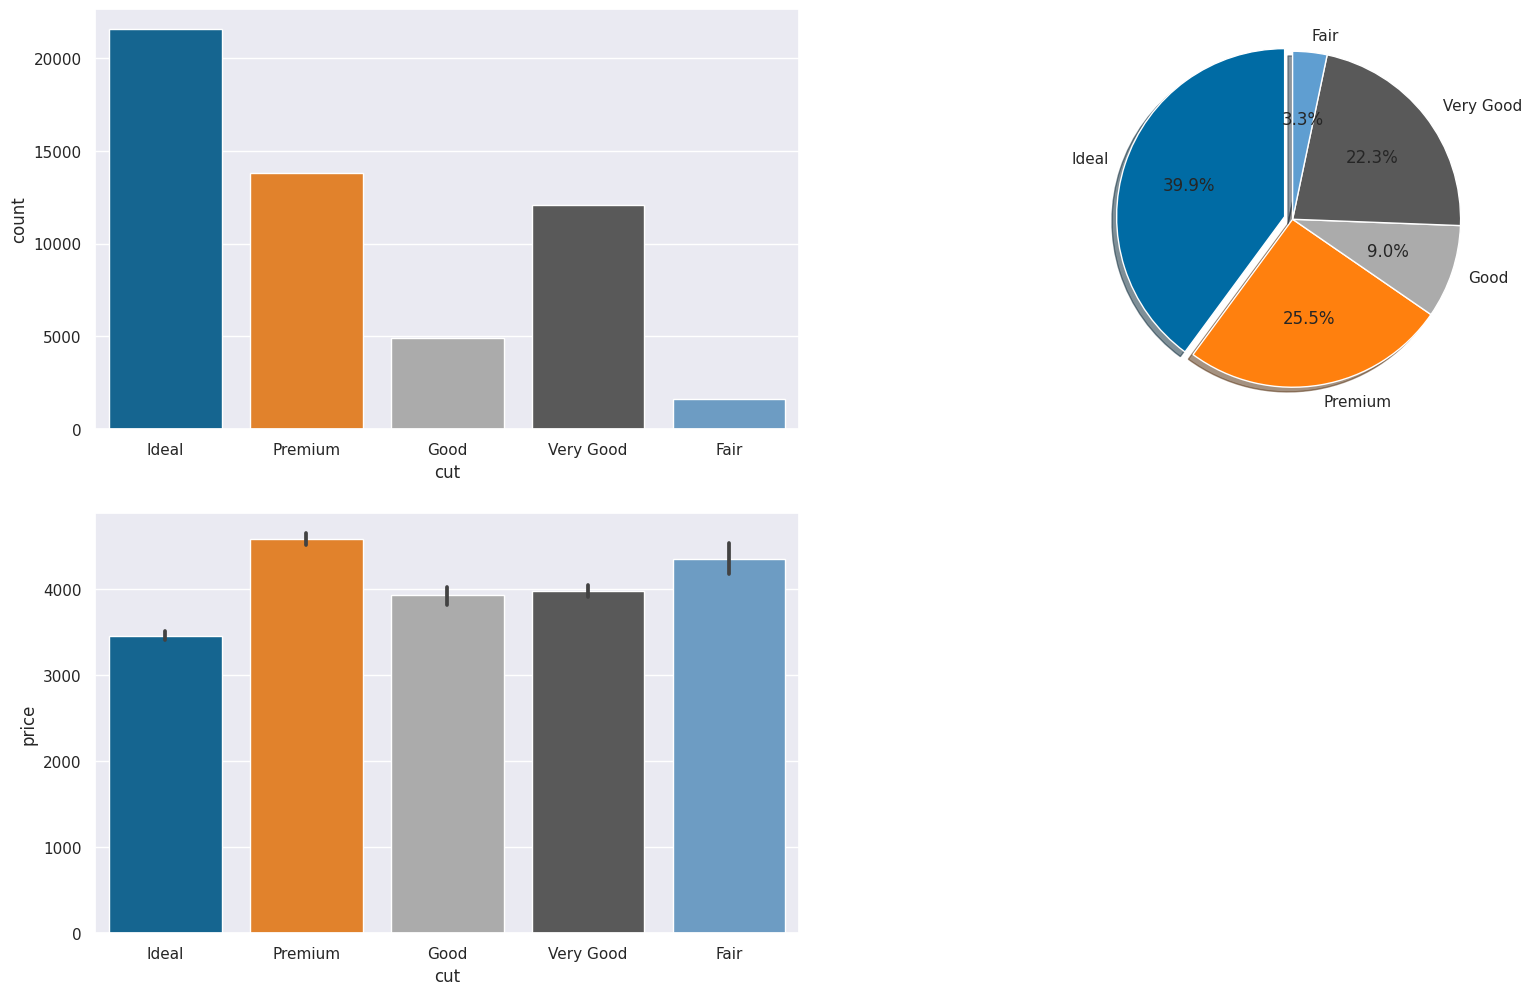

In [60]:
# Description about CUT with a countplot and barplot by price

plt.figure(figsize=(20,12))
description_cut = pd.DataFrame(diamond['cut'].describe())
print(description_cut.T)
print('\n', pd.DataFrame(diamond['cut'].value_counts()).T)

plt.style.use('tableau-colorblind10')

plt.subplot(2,2,1)
sns.countplot(data=diamond, x='cut')

plt.subplot(2,2,2)
size = [39.9, 25.5, 9, 22.3, 3.3]
explode = (0.05, 0, 0, 0, 0)
label = ['Ideal','Premium','Good',' Very Good','Fair']
plt.pie(size ,labels=label, explode=explode, labeldistance=1.1, startangle=90, shadow=True, autopct='%1.1f%%')

plt.subplot(2,2,3)
sns.barplot(data=diamond, x='cut', y='price')

plt.show()

<br>
<h3 align='center'>Observaciones 🕵️‍♂️</h3>
<p>
    <li>Tenemos 5 categorias en la calidad de corte del diamante.</li>
    <br>
    <li><b>Ideal</b> : Representa el 39.9% del conjunto, 21551 cortes con un valor por debajo de los 3500 USD.</li>
    <br>
    <li><b>Premium</b> : Representa el 25.5% del conjunto, 13793 cortes con un valor por debajo de los 4500 USD.</li>
    <br>
    <li><b>Very Good</b> : Representa el 22.3% del conjunto, 12083 cortes con un valor por debajo de los 4000 USD.</li>
    <br>
    <li><b>Good cut</b> : Representa el 9% del conjunto, 4906 cortes con un valor por debajo de los 4000 USD.</li>
    <br>
    <li><b>Fair</b> : Representa el 3.3% del conjunto, 1610 cortes con un valor por debajo de los 4200 USD.</li>
</p>

<br>
<br>
<h2 align='center'>COLOR 🎨</h2>

       count unique top   freq
color  53943      7   G  11292

            G     E     F     H     D     I     J
color  11292  9799  9543  8304  6775  5422  2808


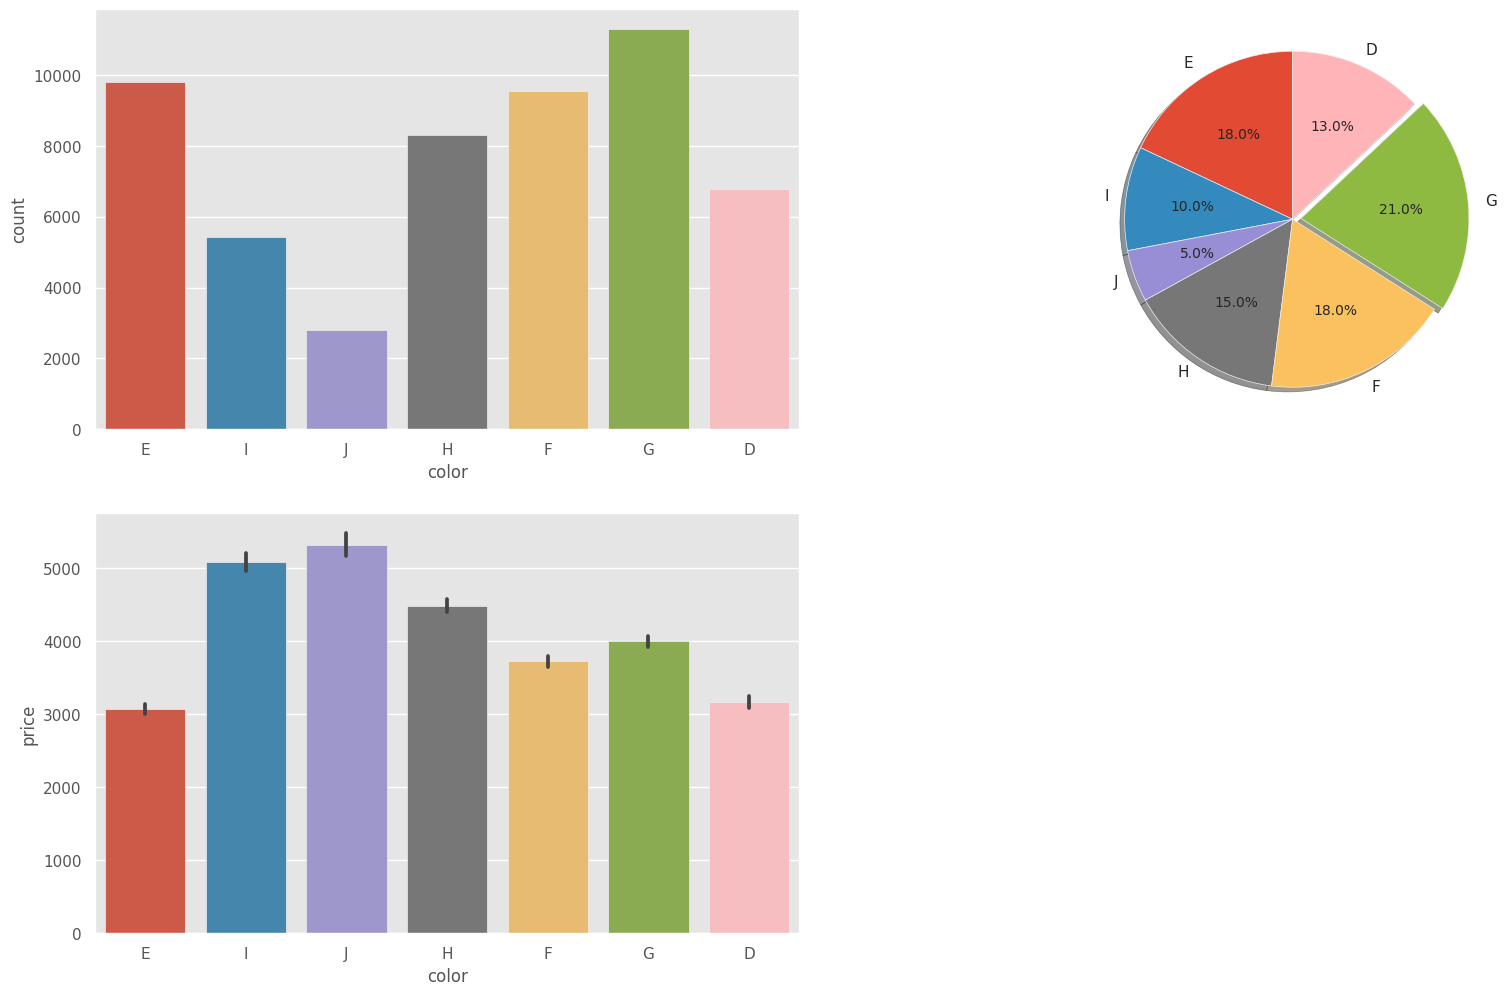

In [61]:
# Description about COLOR with a countplot and barplot by price

plt.figure(figsize=(20,12))
description_color = pd.DataFrame(diamond['color'].describe())
print(description_color.T)
print('\n', pd.DataFrame(diamond['color'].value_counts()).T)

plt.style.use('ggplot')

plt.subplot(2,2,1)
sns.countplot(data=diamond, x='color')

plt.subplot(2,2,2)
size = [18, 10, 5, 15, 18, 21, 13]
explode = (0, 0, 0, 0, 0, 0.05, 0)
label = ['E','I','J','H','F','G','D']
plt.pie(size ,labels=label, explode=explode, labeldistance=1.1, startangle=90, shadow=True, autopct='%1.1f%%')

plt.subplot(2,2,3)
sns.barplot(data=diamond, x='color', y='price')
plt.show()

<br>
<h3 align='center'>Observaciones 🕵️‍♂️</h3>
<p>
    <li>Tenemos 7 colores en los diamantes analizados.</li>
    <br>
    <li><b>G</b> : Representa el 21% del conjunto, se analizaron 11292 diamantes con este color, tienen un valor por debajo de los 4000 USD.</li>
    <br>
    <li><b>E</b> : Representa el 18% del conjunto, se analizaron 9799 diamantes con este color, tienen un valor por debajo de los 3100 USD.</li>
    <br>
    <li><b>F</b> : Representa cerca del 18% del conjunto, se analizaron 9543 diamantes con este color, tienen un valor por debajo de los 3700 USD.</li>
    <br>
    <li><b>H</b> : Representa el 15% del conjunto, se analizaron 8304 diamantes con este color, tienen un valor por debajo de los 4500 USD.</li>
    <br>
    <li><b>D</b> : Representa el 13% del conjunto, se analizaron 6775 diamantes con este color, tienen un valor por debajo de los 3100 USD.</li>
    <br>
    <li><b>I</b> : Representa el 10% del conjunto, se analizaron 5422 diamantes con este color, tienen un valor por debajo de los 5100 USD.</li>
    <br>
    <li><b>J</b> : Representa el 5% del conjunto, se analizaron 2808 diamantes con este color, tienen un valor por debajo de los 5200 USD.</li>
    </li> 
</p>

<br>
<br>
<h2 align='center'>CLARITY 🪄</h2>

         count unique  top   freq
clarity  53943      8  SI1  13067

            SI1    VS2   SI2   VS1  VVS2  VVS1    IF   I1
clarity  13067  12259  9194  8171  5066  3655  1790  741


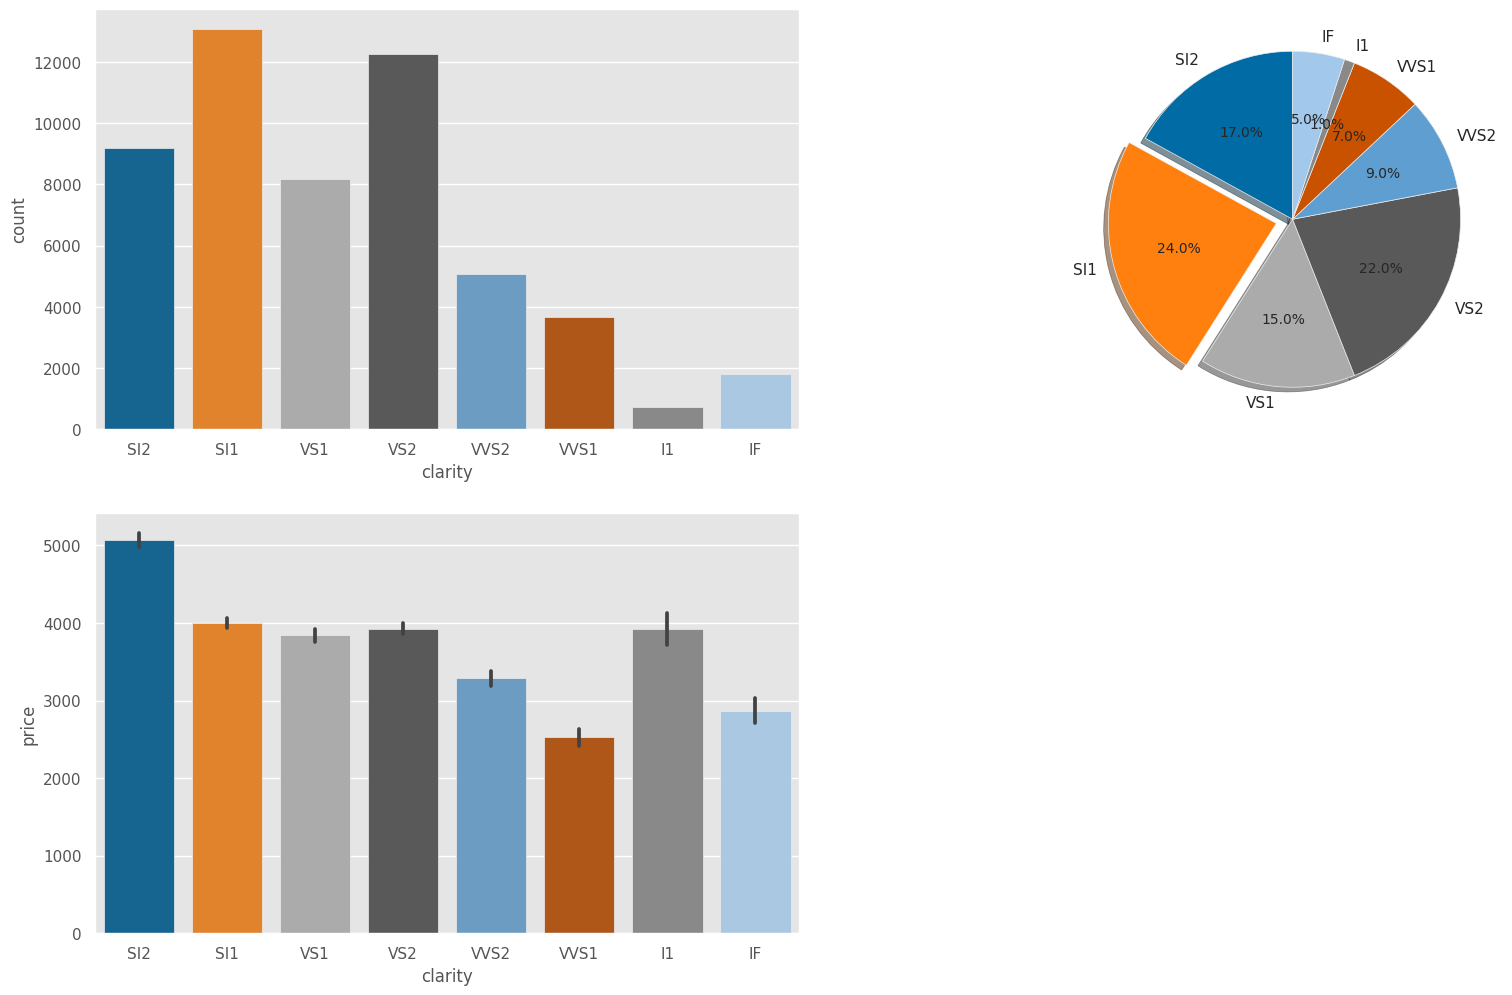

In [62]:
# Description about CLARITY with a countplot and barplot by price

plt.figure(figsize=(20,12))
description_clarity = pd.DataFrame(diamond['clarity'].describe())
print(description_clarity.T)
print('\n', pd.DataFrame(diamond['clarity'].value_counts()).T)

plt.style.use('tableau-colorblind10')

plt.subplot(2,2,1)
sns.countplot(data=diamond, x='clarity')

plt.subplot(2,2,2)
size = [17, 24, 15, 22, 9, 7, 1, 5]
explode = (0, 0.1, 0, 0, 0, 0, 0, 0)
label = ['SI2','SI1','VS1','VS2','VVS2','VVS1','I1','IF']
plt.pie(size ,labels=label, explode=explode, labeldistance=1.1, startangle=90, shadow=True, autopct='%1.1f%%')

plt.subplot(2,2,3)
sns.barplot(data=diamond, x='clarity', y='price')

plt.show()

<br>
<br>
<h2 align='center'>DEPTH ✅</h2>

         count       mean       std   min   25%   50%   75%   max
depth  53943.0  61.749322  1.432626  43.0  61.0  61.8  62.5  79.0


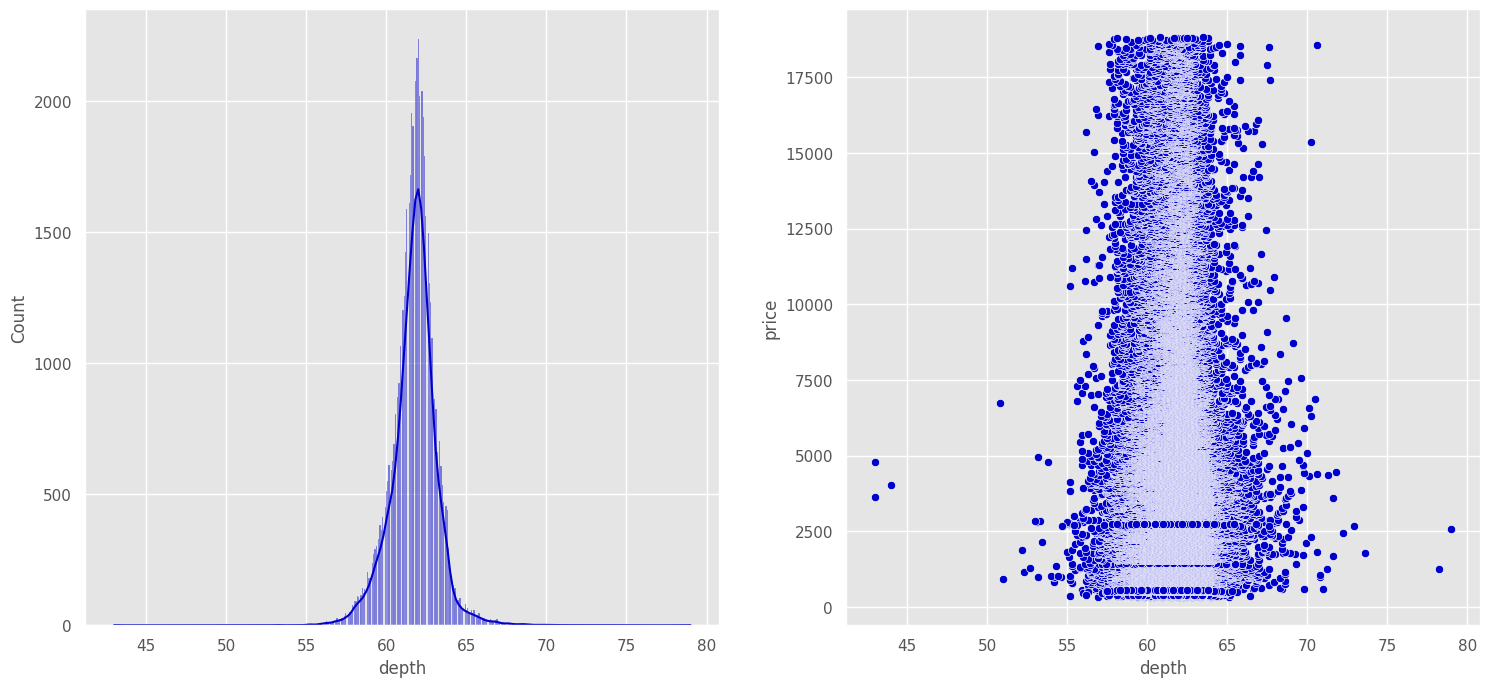

In [63]:
# Description about DEPTH with histogram and scatterplot by price

plt.figure(figsize=(18,8))
description_depth = pd.DataFrame(diamond['depth'].describe())
print(description_depth.T)

plt.subplot(1,2,1)
sns.histplot(data=diamond, x='depth', color='mediumblue', kde=True)
plt.subplot(1,2,2)
sns.scatterplot(data=diamond, x='depth', y='price', color='mediumblue')
plt.show()

<br>
<br>
<h2 align='center'>TABLE ✅</h2>

         count       mean       std   min   25%   50%   75%   max
table  53943.0  57.457251  2.234549  43.0  56.0  57.0  59.0  95.0


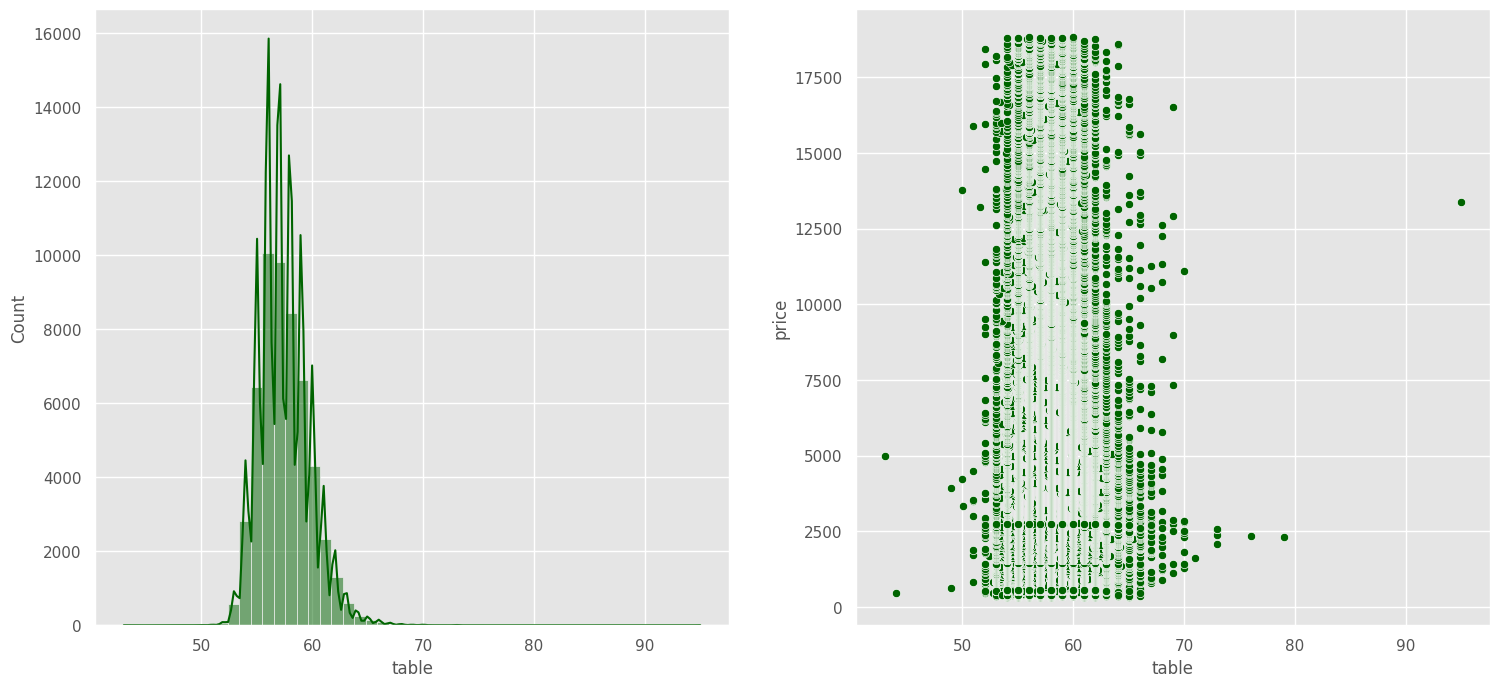

In [64]:
# Description about TABLE with histogram and scatterplot by price

plt.figure(figsize=(18,8))
description_table = pd.DataFrame(diamond['table'].describe())
print(description_table.T)

plt.subplot(1,2,1)
sns.histplot(data=diamond, x='table', color='darkgreen', kde=True, bins=50)
plt.subplot(1,2,2)
sns.scatterplot(data=diamond, x='table', y='price', color='darkgreen')
plt.show()

<br>
<br>
<h2 align='center'>PRICE 💸</h2>

         count         mean          std    min    25%     50%     75%  \
price  53943.0  3932.734294  3989.338447  326.0  950.0  2401.0  5324.0   

           max  
price  18823.0  


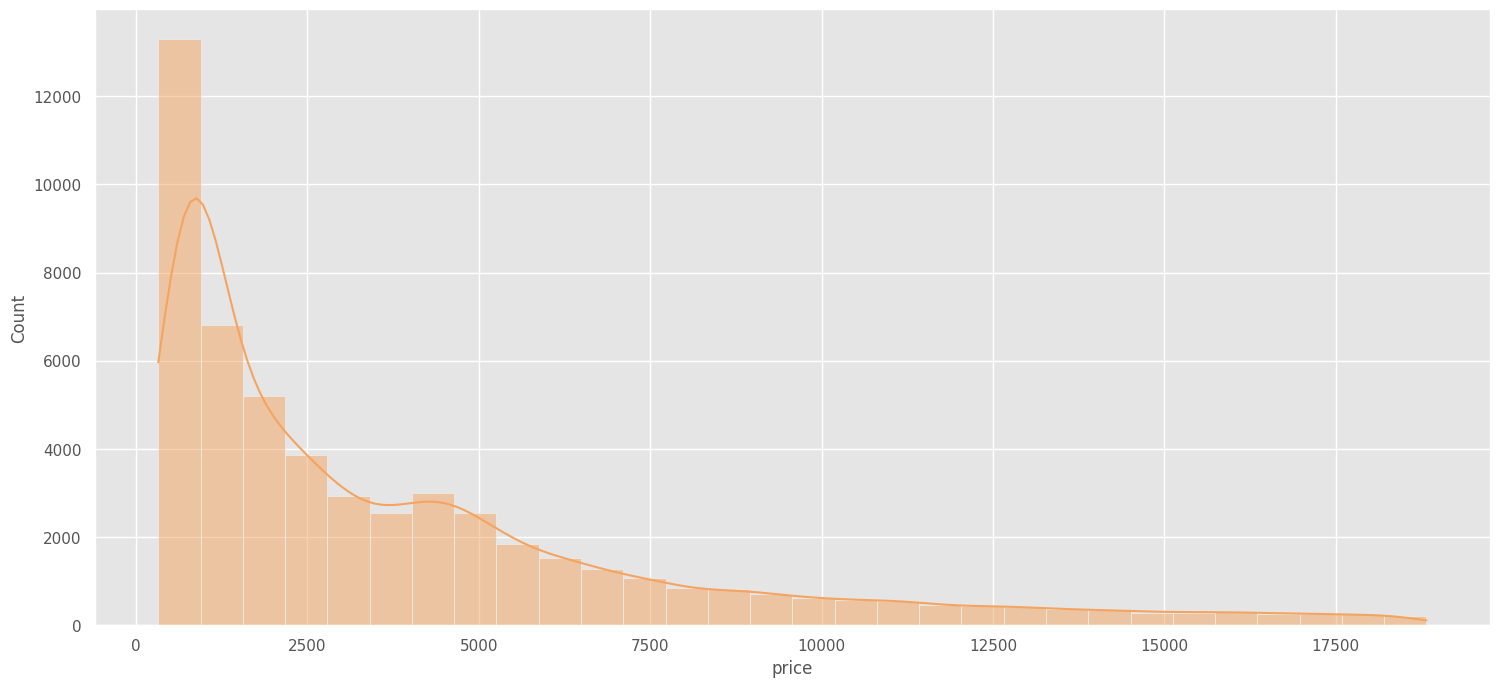

In [65]:
# Description about PRICE with histogram

plt.figure(figsize=(18,8))
description_price = pd.DataFrame(diamond['price'].describe())
print(description_price.T)
sns.histplot(data=diamond, x='price', color='sandybrown', kde=True, bins=30)
plt.show()

<br>
<br>
<h2 align='center'>👉 X 👈</h2>

     count      mean      std  min   25%  50%   75%    max
x  53943.0  5.731158  1.12173  0.0  4.71  5.7  6.54  10.74


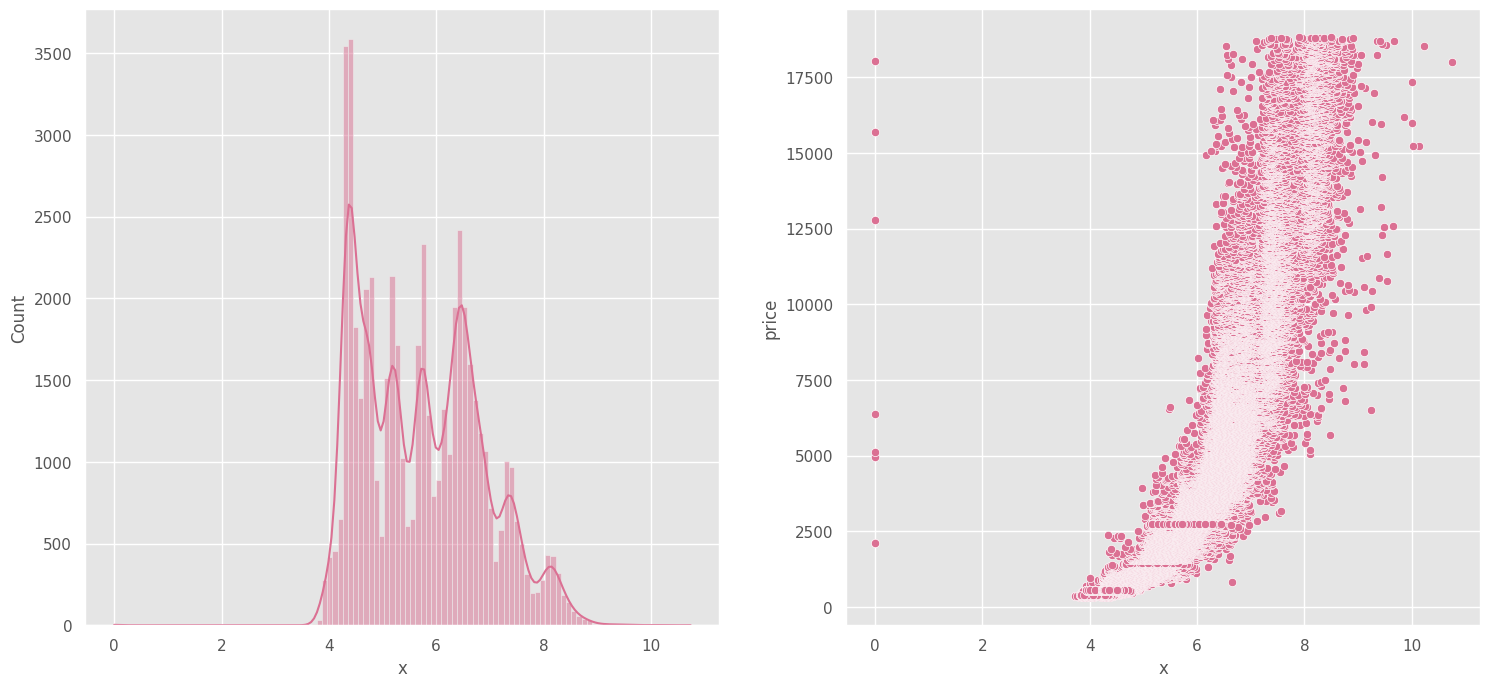

In [66]:
# Description about X with histogram and scatterplot by price

plt.figure(figsize=(18,8))
description_x = pd.DataFrame(diamond['x'].describe())
print(description_x.T)

plt.subplot(1,2,1)
sns.histplot(data=diamond, x='x', color='palevioletred', kde=True)
plt.subplot(1,2,2)
sns.scatterplot(data=diamond, x='x', y='price', color='palevioletred')
plt.show()

<br>
<br>
<h2 align='center'>👉 Y 👈</h2>

     count      mean       std  min   25%   50%   75%   max
y  53943.0  5.734526  1.142103  0.0  4.72  5.71  6.54  58.9


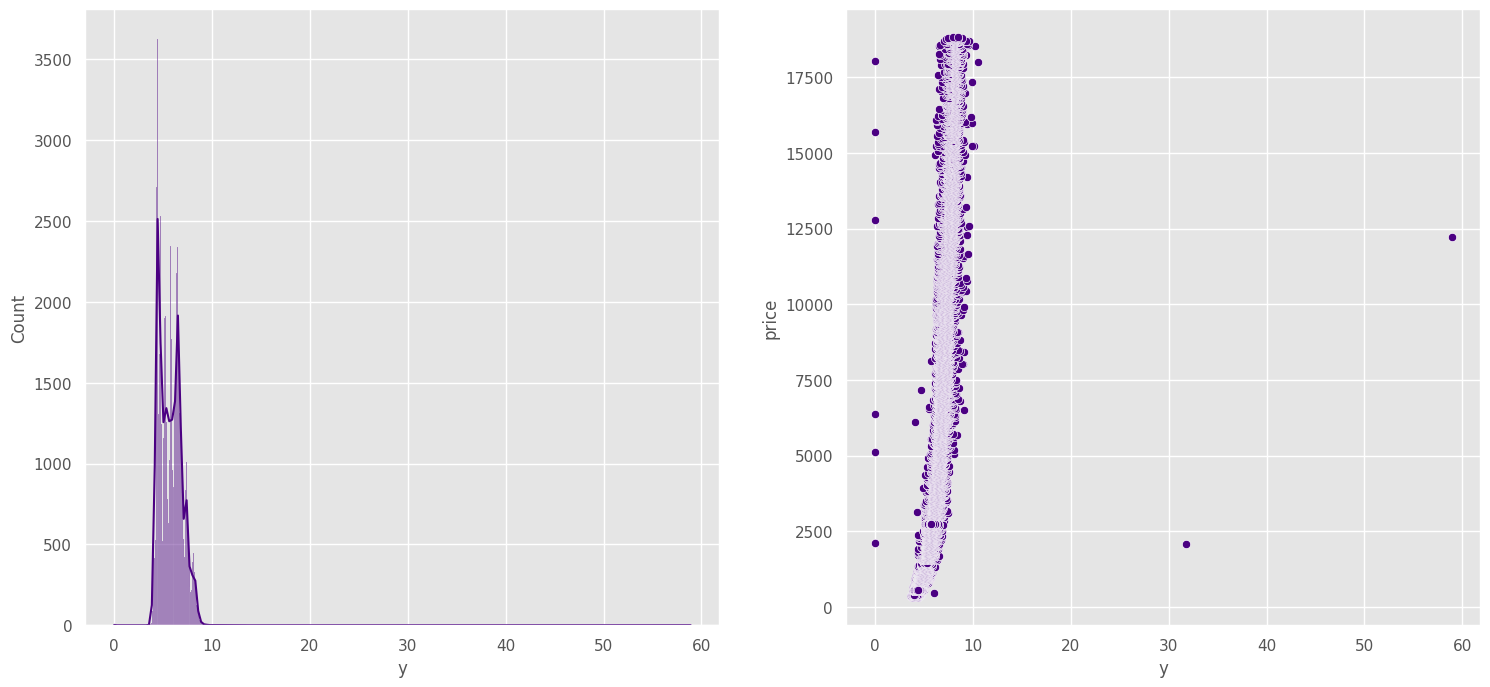

In [67]:
# Description about Y with histogram and scatterplot by price

plt.figure(figsize=(18,8))
description_y = pd.DataFrame(diamond['y'].describe())
print(description_y.T)

plt.subplot(1,2,1)
sns.histplot(data=diamond, x='y', color='indigo', kde=True)
plt.subplot(1,2,2)
sns.scatterplot(data=diamond, x='y', y='price', color='indigo')
plt.show()

<br>
<br>
<h2 align='center'>👉 Z 👈</h2>

     count     mean       std  min   25%   50%   75%   max
z  53943.0  3.53873  0.705679  0.0  2.91  3.53  4.04  31.8


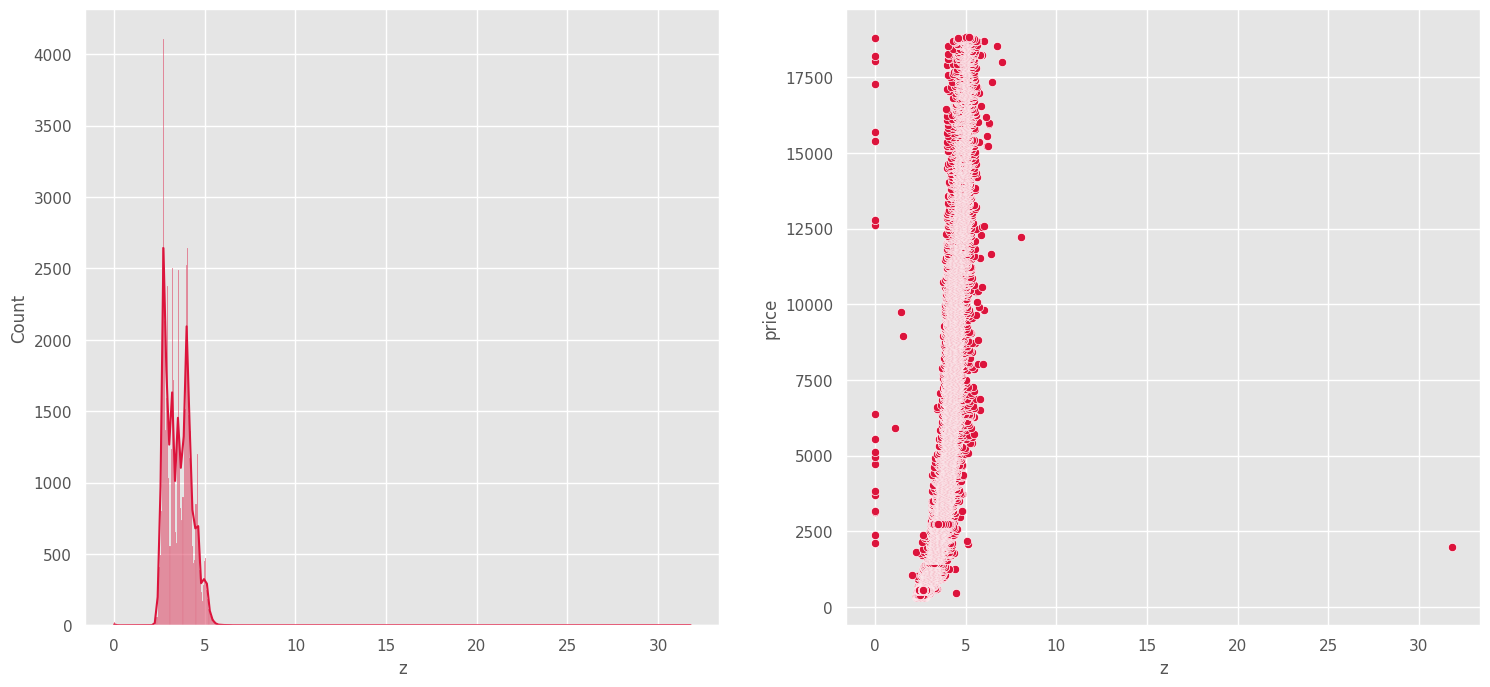

In [68]:
# Description about Z with histogram and scatterplot by price

plt.figure(figsize=(18,8))
description_z = pd.DataFrame(diamond['z'].describe())
print(description_z.T)

plt.subplot(1,2,1)
sns.histplot(data=diamond, x='z', color='crimson', kde=True)
plt.subplot(1,2,2)
sns.scatterplot(data=diamond, x='z', y='price', color='crimson')
plt.show()

<br>
<br>
<h2 align='center'>HEATMAP 🔥</h2>

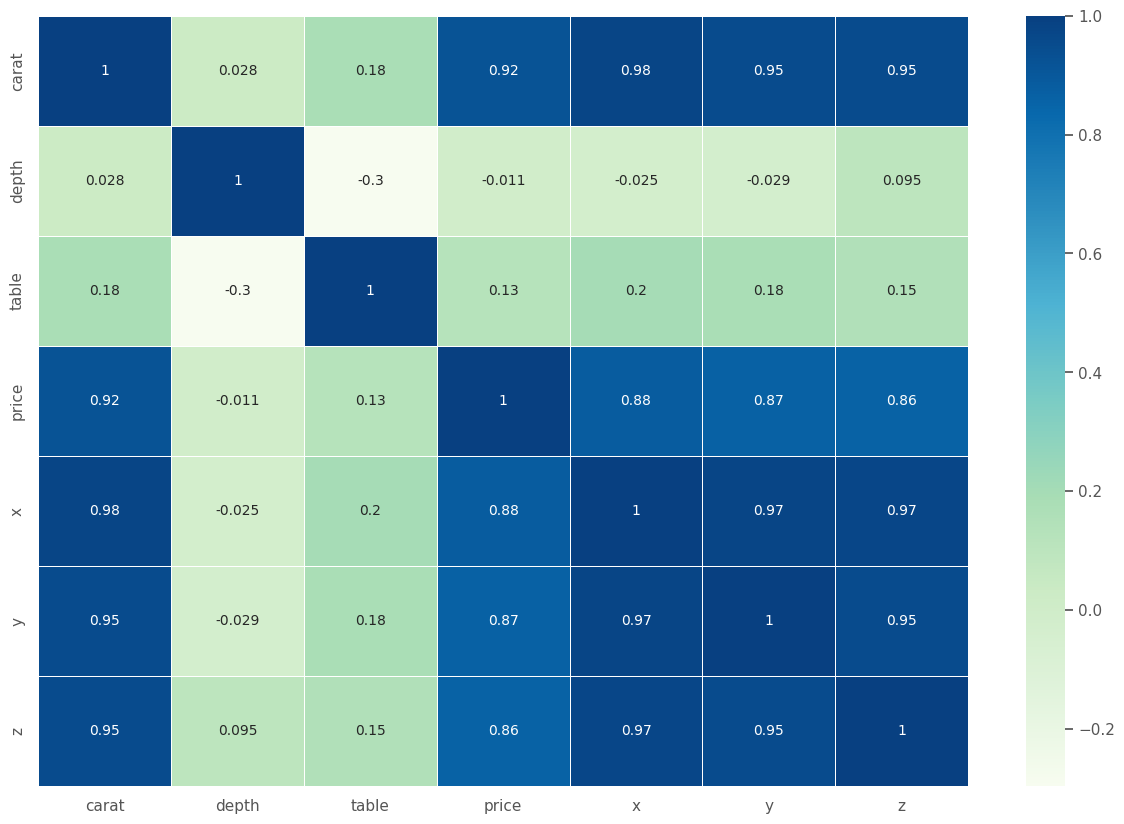

In [69]:
# Heatmap with contains the intercorrelation's matrix

plt.figure(figsize=(15,10))
sns.heatmap(diamond.corr(), annot=True, linewidths=.5, cmap='GnBu')
plt.show()